# 2.20: Set-up

In [3]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# 2.20.1
Create a Seaborn bar plot to visualize the top 5 companies with the highest median salary_year_avg for Data Scientist job postings in the United States.

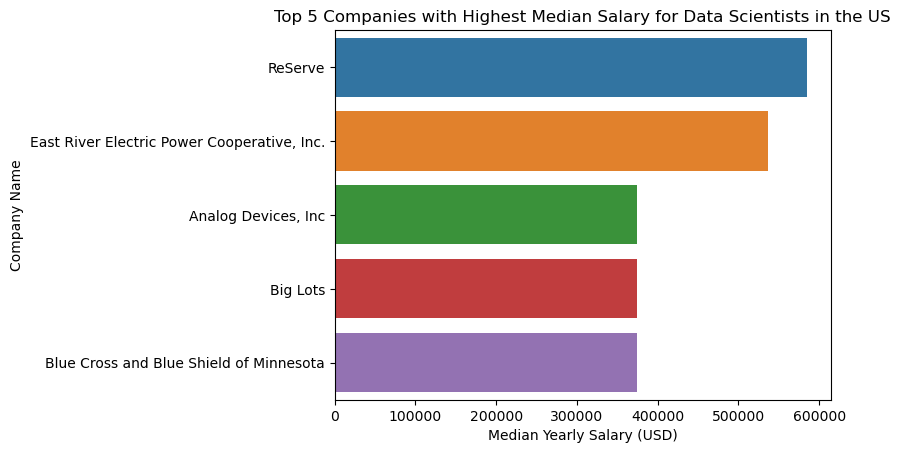

In [5]:
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg']).copy()
top_companies = df_DS_US.groupby('company_name')['salary_year_avg'].median().nlargest(5).reset_index()

sns.barplot(data=top_companies, x='salary_year_avg', y='company_name', hue='company_name')
plt.title('Top 5 Companies with Highest Median Salary for Data Scientists in the US')
plt.xlabel('Median Yearly Salary (USD)')
plt.ylabel('Company Name')
plt.show()

# 2.20.2
Create a histogram using Seaborn to visualize the distribution of average yearly salaries (use the salary_year_avg column) for Data Scientist job postings in the United States:

- Filter the DataFrame to include only job postings in the United States and remove any entries with missing yearly salary values.

- Use 25 bins for the histogram and set the x-axis limit to 700,000.

- Set the title to 'Distribution of Yearly Salaries for Data Scientist in the United States' and label the y-axis 'Number of Jobs' and x-axis 'Yearly Salary (USD)'.

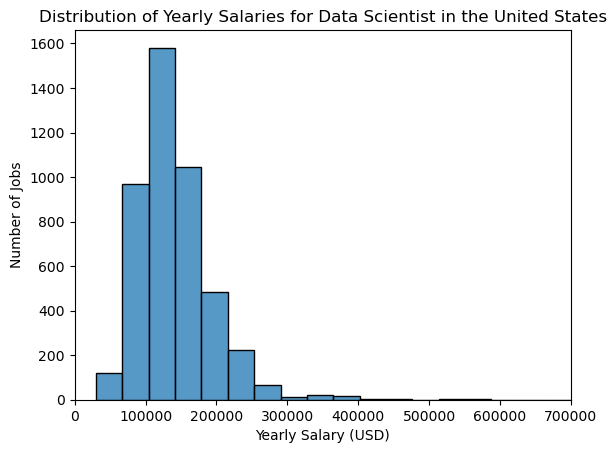

In [6]:
# Filter for Data Scientist job postings in the United States
us_ds_jobs = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Scientist')].copy()

# Drop NaN values from the 'salary_year_avg' column
us_ds_jobs = us_ds_jobs.dropna(subset=['salary_year_avg'])

# Plot histogram for yearly average salary
sns.histplot(us_ds_jobs['salary_year_avg'], bins=25, kde=False)
plt.title('Distribution of Yearly Salaries for Data Scientist in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Number of Jobs')
plt.xlim(0,700000)
plt.show()

# 2.20.3
Create a box plot using Seaborn to compare the yearly salaries (use the salary_year_avg column) of Data Analyst, Data Engineer, and Data Scientist job postings in India:

- Filter the DataFrame to include only job postings in India and remove any entries with missing yearly salary values.

- Set the x-axis limit to 300,000 and format it as $100k.

- Set the title to 'Yearly Salary Comparison for Data Roles in India' and label the x-axis as 'Yearly Salary (USD)'.

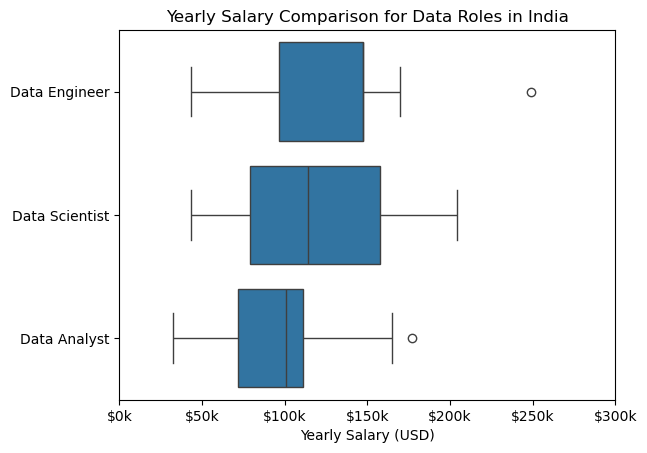

In [7]:
# Filter for Data Analyst, Data Engineer, and Data Scientist job postings in India
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
india_jobs = df[(df['job_country'] == 'India') & (df['job_title_short'].isin(job_titles))]

# Drop NaN values from the 'salary_year_avg' column
india_jobs = india_jobs.dropna(subset=['salary_year_avg'])

# Plot box plot for yearly average salary
sns.boxplot(data=india_jobs, x='salary_year_avg', y='job_title_short')
plt.title('Yearly Salary Comparison for Data Roles in India')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 300000)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
plt.show()

# 2.20.4
- Create a violin plot using Seaborn to visualize the distribution of salary_year_avg for Data Scientist roles in the United States.

- Ensure the plot includes a title, axis labels, and custom formatting for the salary axis.

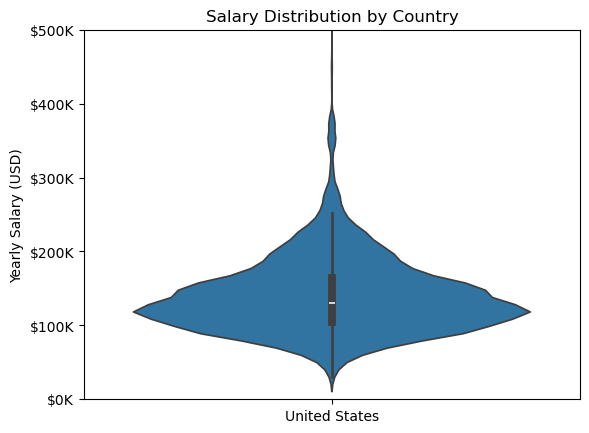

In [9]:
# Filter the DataFrame for Data Scientist job postings in the United States
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])
# Plot chart
sns.violinplot(x='job_country', y='salary_year_avg', data=df_DS_US)
plt.title('Salary Distribution by Country')
plt.xlabel('')
plt.ylabel('Yearly Salary (USD)')
plt.ylim(0, 500000)  
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()